In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
import gridworld
import argparse

# algorithm='q_learning'
algorithms=['sarsa', 'q_learning']
# algorithm='value_iteration'


def get_alg_module(alg, submodule=None):
    from importlib import import_module
    submodule = submodule or alg
    try:
        # first try to import the alg module from baselines
        alg_module = import_module('.'.join(['models', alg, submodule]))
    except ImportError:
        # then from rl_algs
        alg_module = import_module('.'.join(['rl_' + 'algs', alg, submodule]))

    return alg_module


def get_learn_function(alg):
    return get_alg_module(alg).learn


# Create environment
env = gridworld.GridWorld(hard_version=False)

learn = get_learn_function(alg=algorithms[0])
model = learn(env, epsilon=0.3, alpha=0.5, max_it=500)

# Initialize simulation
s = env.reset()

# Create log to store data from simulation
log = {
    't': [0],
    's': [s],
    'a': [],
    'r': [],
}

# Simulate until episode is done
done = False

while not done:
    a = model.get_policy(s)
    (s, r, done) = env.step(a)
    log['t'].append(log['t'][-1] + 1)
    log['s'].append(s)
    log['a'].append(a)
    log['r'].append(r)

    model.get_log().add('trajectory', env.get_pos(s), 'trajectory', color='red', alpha=0.5)

[[21.3783075  15.93811791 18.50220987 14.99589601]
 [20.15973219 17.99676296 20.27359548 19.38932141]
 [17.82573649 16.90232456  9.13778108 14.54777312]
 [18.04240571 18.49279114 20.45386632 19.561267  ]
 [15.42459851 15.66835051 17.77740439 12.17552058]
 [16.45259118 18.31815369 14.04470252 15.34845003]
 [15.35549054 20.14109198 15.1940141  14.73449346]
 [15.28116647 15.794926   17.76012349 14.84231603]
 [15.53235812 18.65652307 16.20997839 13.7549187 ]
 [13.03076244 15.43457523 17.87592472 12.41870582]
 [15.20838188 17.82535502 12.98030403 15.13345267]
 [14.91562922 12.06455673 14.32060963 13.12070262]
 [14.94096768  7.69517868 11.09328496 12.69987767]
 [14.58378078  7.98440872 13.31578255 13.75657368]
 [13.56561826 15.84250212 11.73555213 12.25141445]
 [12.51831711 16.02260143 13.27494573 11.51264611]
 [12.2352154  13.91548303 12.61852766 12.16377807]
 [14.30846157 12.52585428 13.07509482 10.56255056]
 [11.04192208 16.08288238 13.22002968 10.68802188]
 [ 3.66648212  5.56525647 12.42

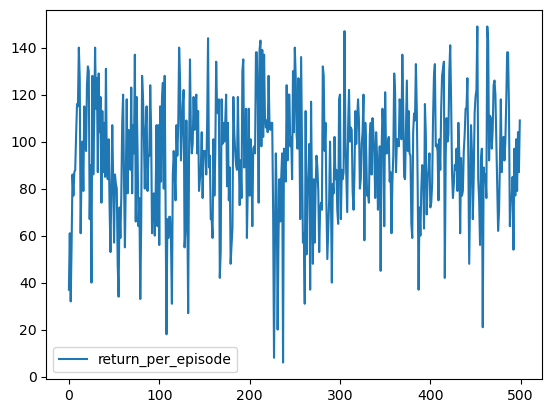

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


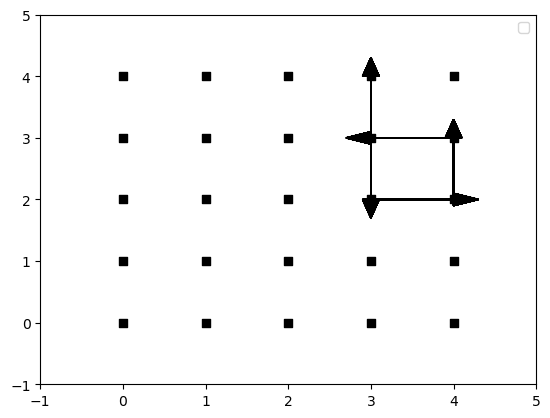

[(2, 3), (2, 4), (1, 4), (1, 3), (0, 3), (2, 3), (2, 4), (1, 4), (1, 3), (0, 3), (2, 3), (2, 4), (1, 4), (1, 3), (0, 3), (2, 3), (2, 4), (1, 4), (1, 3), (0, 3), (2, 3), (2, 4), (1, 4), (1, 3), (0, 3), (2, 3), (2, 4), (1, 4), (1, 3), (0, 3), (2, 3), (2, 4), (1, 4), (1, 3), (0, 3), (2, 3), (2, 4), (1, 4), (1, 3), (0, 3), (2, 3), (2, 4), (1, 4), (1, 3), (0, 3), (2, 3), (2, 4), (1, 4), (1, 3), (0, 3), (2, 3), (2, 4), (1, 4), (1, 3), (0, 3), (2, 3), (2, 4), (1, 4), (1, 3), (0, 3), (2, 3), (2, 4), (1, 4), (1, 3), (0, 3), (2, 3), (2, 4), (1, 4), (1, 3), (0, 3), (2, 3), (2, 4), (1, 4), (1, 3), (0, 3), (2, 3), (2, 4), (1, 4), (1, 3), (0, 3), (2, 3), (2, 4), (1, 4), (1, 3), (0, 3), (2, 3), (2, 4), (1, 4), (1, 3), (0, 3), (2, 3), (2, 4), (1, 4), (1, 3), (0, 3), (2, 3), (2, 4), (1, 4), (1, 3), (0, 3)]


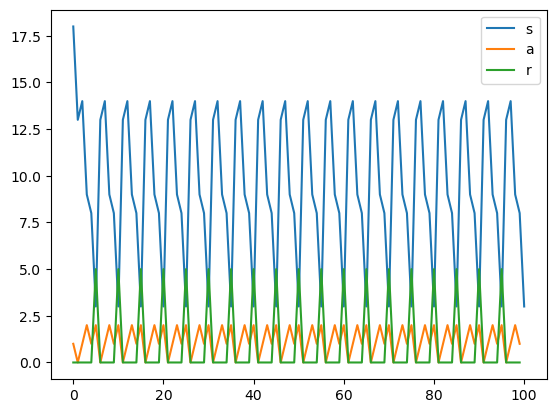

In [6]:
model.log.plot(save=True)
print(model.log.values['trajectory'])

# Plot data and save to png file
plt.plot(log['t'], log['s'])
plt.plot(log['t'][:-1], log['a'])
plt.plot(log['t'][:-1], log['r'])
plt.legend(['s', 'a', 'r'])
plt.savefig('figures/gridworld/test_gridworld.png')
plt.show()